In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Load the concrete dataset
data = pd.read_csv('concrete.csv') 

# Displaying the first few rows to make sure everything had loaded in correctly
print(data.head())
print(data.columns)

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


In [3]:
# Definining the features (X) and target (y)
X = data.drop('strength', axis=1)  # Features
y = data['strength']               # Target

In [4]:
# Split the datset into training and testing sets using an 80/20 split; also setting the random state as 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

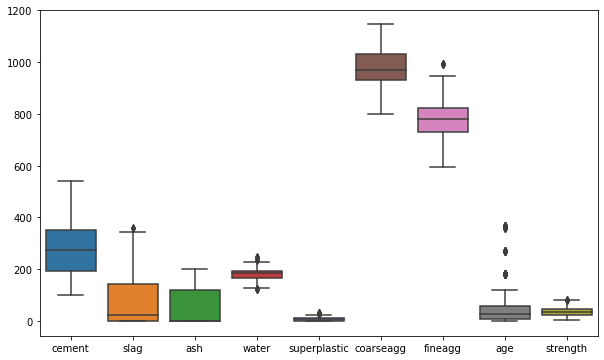

In [5]:
# Visualization of the dataset with a boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()

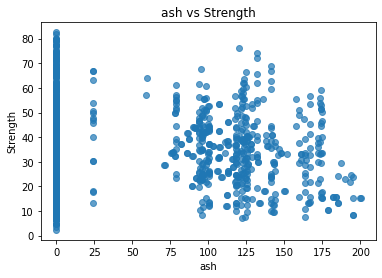

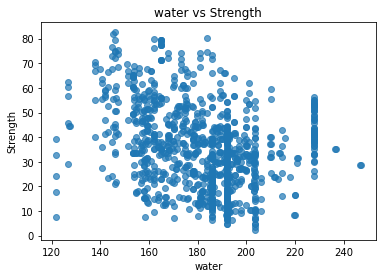

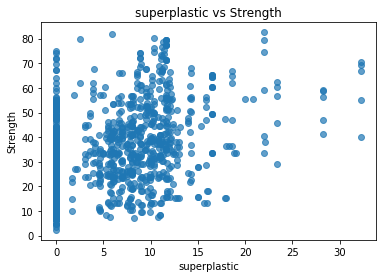

In [6]:
# Scatter Plot to visualize the relationship between certain features and target variable
for feature in ['ash', 'water', 'superplastic']: 
    plt.scatter(data[feature], data['strength'], alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Strength')
    plt.title(f'{feature} vs Strength')
    plt.show()

In [7]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [8]:
# Model evaluation
def evaluate_model(model_name, y_true, y_pred):
    #calculating the mean absolute error 
    mae = mean_absolute_error(y_true, y_pred)
    #caculating the mean squared error
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R² Score: {r2:.2f}")
    print()

In [9]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest Regression", y_test, y_pred_rf)

Linear Regression Performance:
  Mean Absolute Error (MAE): 8.39
  Mean Squared Error (MSE): 112.13
  R² Score: 0.61

Random Forest Regression Performance:
  Mean Absolute Error (MAE): 3.28
  Mean Squared Error (MSE): 25.24
  R² Score: 0.91



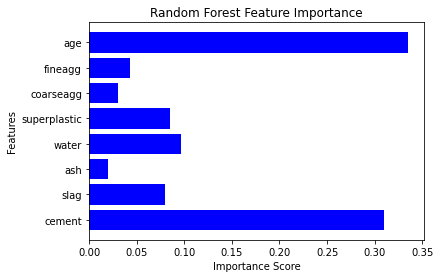

In [10]:
# Bar graph visualizaing the feature importance in the random forest model
importances = rf.feature_importances_
features = X.columns
plt.barh(features, importances, color='blue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [11]:
# Hyperprameter tuning for the random forest model
n_estimators = [10, 50, 100, 200, 500]
mean_rmse = []

In [12]:
# Perform cross validation for each value of n_estimators
for n in n_estimators:
    rf_tuning = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = -cross_val_score(rf_tuning, X, y, cv=5, scoring='neg_root_mean_squared_error')
    mean_rmse.append(scores.mean())

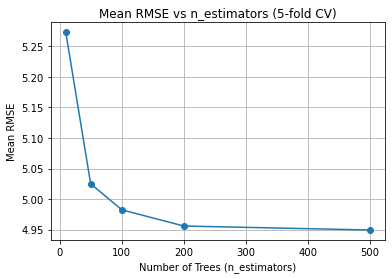

In [13]:
# Plot RMSE values against the number of estimators

plt.plot(n_estimators, mean_rmse, marker='o')
plt.title('Mean RMSE vs n_estimators (5-fold CV)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean RMSE')
plt.grid()
plt.show()